# Reducing dimensions

supervised method= you need to train it

Function to optimize is the trajectory , preserving local structure over things that are far away. You want to know well locally what happens don't care so much about globally

In [8]:
library(MASS)

### Classical multidimensional scaling

**Eurodist =matrice de distance (matrice triangulaire)**

Sinon il faudrait à partir des données recalculer la matrice des distances

In [3]:
head(eurodist)

[1] 3313 2963 3175 3339 2762 3276

In [1]:
loc=cmdscale(eurodist)

In [4]:
head(loc)

Athens,2290.275,1798.803
Barcelona,-825.3828,546.8115
Brussels,59.18334,-367.08135
Calais,-82.84597,-429.91466
Cherbourg,-352.4994,-290.9084
Cologne,293.6896,-405.3119


In [2]:
x=loc[,1]
y=loc[,2]

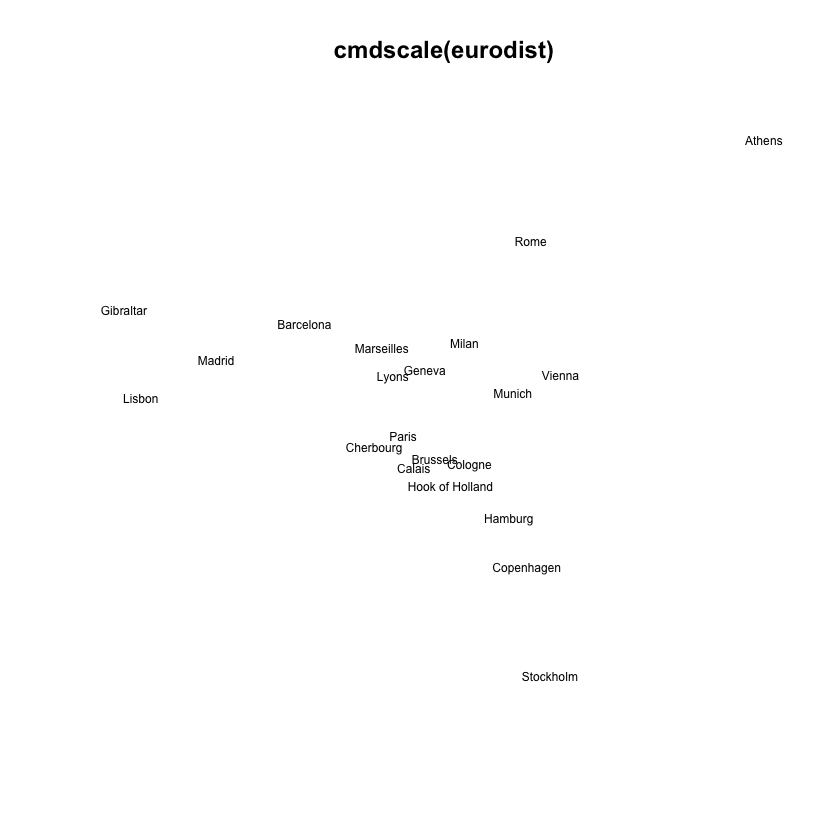

In [6]:
plot(x,y,type="n",xlab="", ylab="", asp=1,axes=FALSE,main="cmdscale(eurodist)")
text(x,y,rownames(loc),cex=0.6)

## Sammon scaling

In [19]:
locsam=sammon(eurodist)
x2=locsam$points[,1]
y2=locsam$points[,2]

Initial stress        : 0.01705
stress after  10 iters: 0.00951, magic = 0.500
stress after  20 iters: 0.00941, magic = 0.500


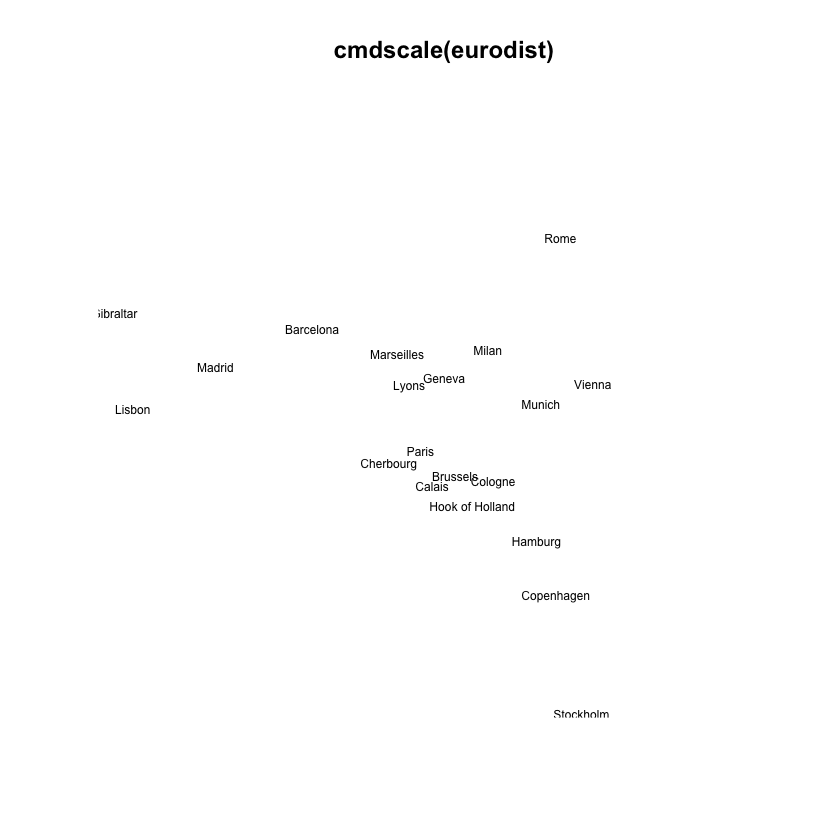

In [21]:
#En gros le plot créé le cadre, le texte d'apres les lignes
plot(x2,y2, type="n",xlab="",ylab="",asp=1,axes=FALSE,main="cmdscale(eurodist)")
text(x,y,rownames(loc),cex=0.6)

##locally linear embedding main function

In [13]:
dat4 = read.table("CM4.dat", h = T, sep = ",")
dat4 = dat4[,-1]
colnames(dat4) = c("Rock", "Rap", "Reggae", "classique" , "R&B", "Latino", "Jazz", "Elec", "Country")

Pour le

In [15]:
library(lle)

Loading required package: scatterplot3d
Loading required package: snowfall
Loading required package: snow


m nombre de coordinnées à obtenir, k choisi randommely (nombre de voisin à prendre en compte)

In [16]:
pos.lle=lle(dat4,m=2,k=5)

finding neighbours
calculating weights
computing coordinates


In [17]:
#la ca sort les coordonnées
head(pos.lle$Y)

0.05048568,0.59251915
0.05048568,0.59251915
-1.5268827,0.6288148
1.8502397,0.2442763
-1.5055485,0.5876632
0.2023727,0.6060747


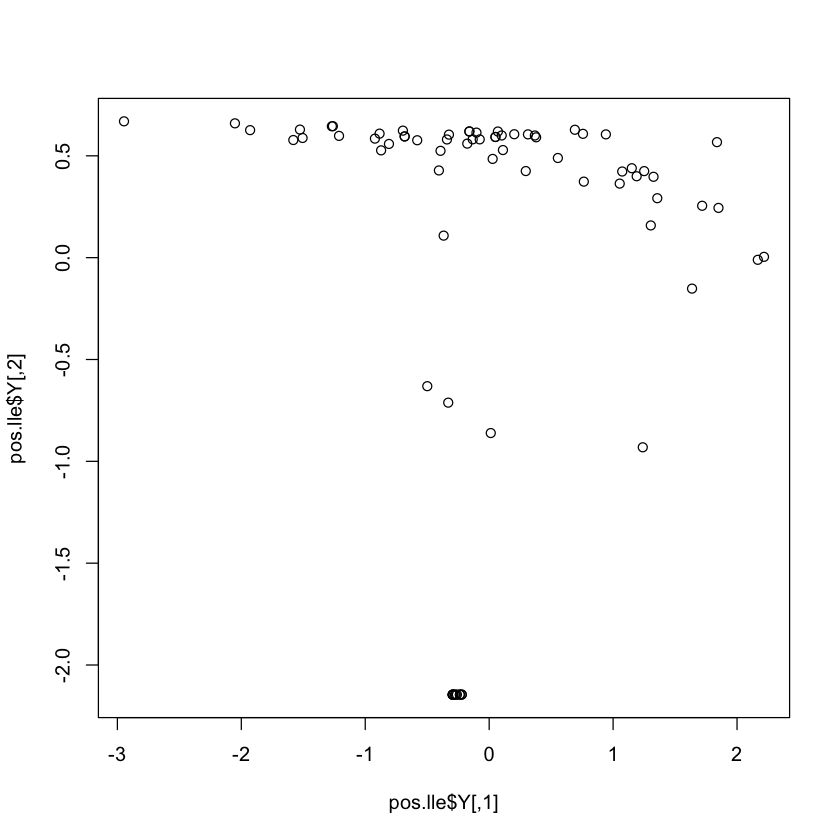

In [18]:
plot(pos.lle$Y)

#Random Forest

- Random decision trees are built (column by column that are sampled randomly
- Usually thousands tree.
- each tree votes for each new comer => deterministic
- easy to set up

Things you can get from these trees
- you can check at what level of the tree each variable is chosen : if v4 always chosen before v2 ; pathway must be v4 then splits into v2 or not
- can rate how much parameters depend on each other
- What has more impact on a phenotype for example

In [25]:
library(randomForest)

- expliquer les espèces de iris en fonction de toutes les autres colonnes
- importance : imortance de la variable (quand est ce qu'elle split)
- proximity : proximity des individus entre eux (comben de fois ils  se retrouvent dans le même noeud à la fin)

In [27]:
iris.rf=randomForest(Species~.,data=iris, importance=TRUE, proximity=TRUE)

In [30]:
iris.rf


Call:
 randomForest(formula = Species ~ ., data = iris, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06

** OOB : out of bag estimate => does cross validation => error : 4% **
prend les individus qui n'ont pas servis pour certains arbres

** donne la matrice de contingence **

In [29]:
summary(iris.rf)

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted         150  factor numeric  
err.rate         2000  -none- numeric  
confusion          12  -none- numeric  
votes             450  matrix numeric  
oob.times         150  -none- numeric  
classes             3  -none- character
importance         20  -none- numeric  
importanceSD       16  -none- numeric  
localImportance     0  -none- NULL     
proximity       22500  -none- numeric  
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y                 150  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

# Try those techniques

In [31]:
heart_complete=read.table("SAheart.data", header=TRUE, sep=",")
heart=heart_complete[,-c(1)]
head(heart)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12,5.73,23.11,Present,49,25.3,97.2,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.5,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.6,3.5,27.78,Present,60,25.99,57.34,49,1
6,132,6.2,6.47,36.21,Present,62,30.77,14.14,45,0


In [36]:
heart.rf=randomForest(as.factor(chd) ~ .,data=heart, importance=TRUE, proximity=TRUE)

In [37]:
heart.rf


Call:
 randomForest(formula = as.factor(chd) ~ ., data = heart, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 30.95%
Confusion matrix:
    0  1 class.error
0 252 50   0.1655629
1  93 67   0.5812500